In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# retrieve and import files
path = "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
df = pd.read_csv(path, sep=r"\s+", header=None, names=["index", "feature"])
feature_names = df.loc[:, "feature"]
print(feature_names)

# feature engineer
# feature engineered columns
selected_indices = [
    2,3,4,6,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
    41,42,43,44,45,46,56,58,59,63,64,65,66,70,74,78,79,80,
    81,82,83,107,108,109,111,112,113,115,116,117,118,119,120,
    201,202,203,204,205,206,207,208,209,210,211,212,213,
    214,215,216,217,218,219,220,221,222,223,224,225,226,
    227,228,229,230,231,232,233,234,235,236,237,238,239,
    240,242,243,244,245,246,247,248,249,250,251,252,
    253,255,256,258,259,260,261,262,263,264,265,
    266,267,268,269,270,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,
    304,307,312,316,317,320,322,323,330,331,332,334,336,337,338,339,340,344,345,
    357,358,359,
    370,371,372,373,374,375,376,378,380,
    382,385,386,387,388,389,
    396,399,400,401,402,403,
    410,413,414,415,416,417,
    436,437,438,
    449,450,451,452,453,454,455,457,459,
    461,462,463,464,465,466,467,468,471,473,475,476,477,478,479,480,481,482,483,484,486,488,489,490,491,492,493,494,495,497,498,499,500,501,502,
    503,507,512,513,514,
    520,525,526,527,
    531,533,538,539,540,
    546,549,551,552,553,
    555,556,557,558,559,560,561
]

# Convert to zero-based indexing:
selected_indices = [i-1 for i in selected_indices]

# final features
features = feature_names.iloc[selected_indices].values

print(features.shape)

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: feature, Length: 561, dtype: object
(274,)


In [ ]:
# import training data
X_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt", sep=r"\s+", header=None)
X_train = X_train.iloc[:, selected_indices]
X_train.columns = features

print("Shape of X_train:", X_train.shape)
X_train.head()

# get the activity labels
activity_df = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt", sep=r"\s+", header = None)
print(activity_df[0].tolist())
print(activity_df[1].tolist())

# import y train and label activity data
y_train = pd.read_csv("/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt", header=None, names=["Activity Label"])
y_train['Activity'] = y_train['Activity Label'].map({
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
})

print("Shape of y_train:", y_train.shape)
y_train.head(10)

Shape of X_train: (7352, 274)
[1, 2, 3, 4, 5, 6]
['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
Shape of y_train: (7352, 2)


,Activity Label,Activity
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
5,5,STANDING
6,5,STANDING
7,5,STANDING
8,5,STANDING
9,5,STANDING


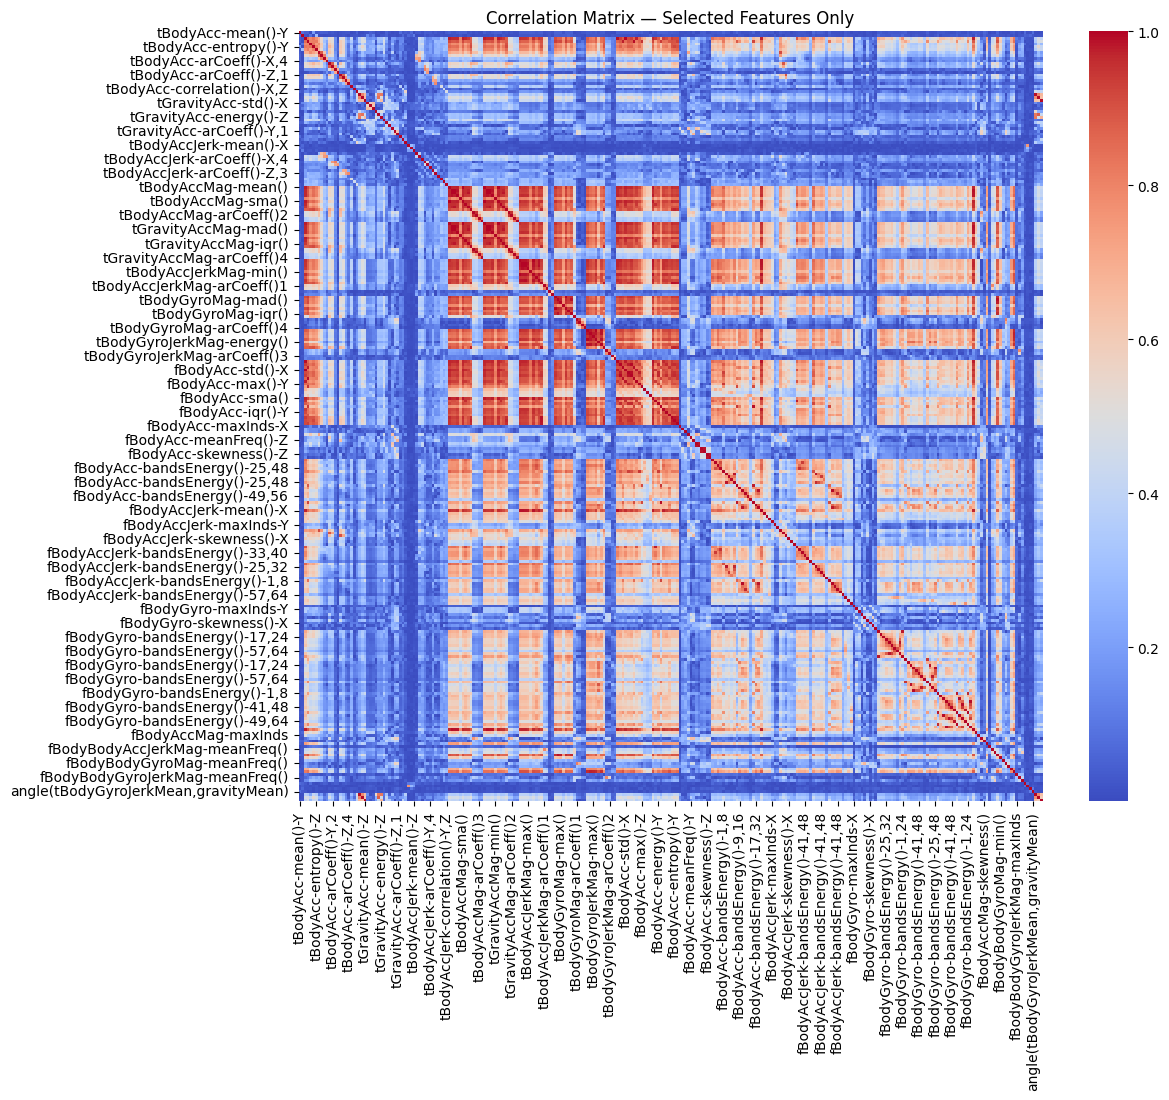

Highly correlated features to drop: ['tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tBodyAccMag-arCoeff()2', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-sma()', 'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'tBodyGyroMag-arCoeff()2', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-mad()

In [ ]:
# feature engineering using a correlation matrix

# Compute correlations
corr_matrix = X_train.corr().abs()

# Plot full heatmap (may be large)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix — Selected Features Only")
plt.show()

# Keep only the upper triangle (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)
print("Number to drop:", len(to_drop))

for i in to_drop:
  print(i)

# Drop columns
# X_reduced = X_train.drop(columns=to_drop)
# print("Original shape:", X_train.shape)
# print("Reduced shape:", X_reduced.shape)

